<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch04/04_karaage_ai_book_style_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StyleGan で架空の人物を生成

TensorFlow 1.xに切り替えてインポートします。

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


StyleGANをダウンロードします。

In [2]:
!git clone https://github.com/NVlabs/stylegan
%cd stylegan

Cloning into 'stylegan'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), done.
/content/stylegan


必要なライブラリをインポートします。

In [3]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

In [4]:
tflib.init_tf()

# Load pre-trained network.
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
  _G, _D, Gs = pickle.load(f)

OSError: ignored

もし Google Drive quota exceededというエラーがでたら、以下から直接ファイルをダウンロードして、自分のマイドライブにアップした後、Google ColabとGoogle Driveを連携してからファイルをコピーしてください。

https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


以下でファイルをコピーします。

In [ ]:
!cp '/content/drive/My Drive/karras2019stylegan-ffhq-1024x1024.pkl' ./

学習済みのネットワークを読み込みます。

In [6]:
with open('karras2019stylegan-ffhq-1024x1024.pkl', 'rb') as f:
  _G, _D, Gs = pickle.load(f)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


ネットワークの中身を表示します。

In [7]:
Gs.print_layers()


Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3                262656 

画像のファイル名を決めます。

In [8]:
image_filename = 'example.png'

ノイズを生成します。

In [9]:
noise = np.random.uniform(size=[1, 512], low=-1.0, high=1.0)
noise.shape

(1, 512)

ノイズから画像を生成します。

In [10]:
# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(noise, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

# Save image.
PIL.Image.fromarray(images[0], 'RGB').save(image_filename)

画像を表示します。

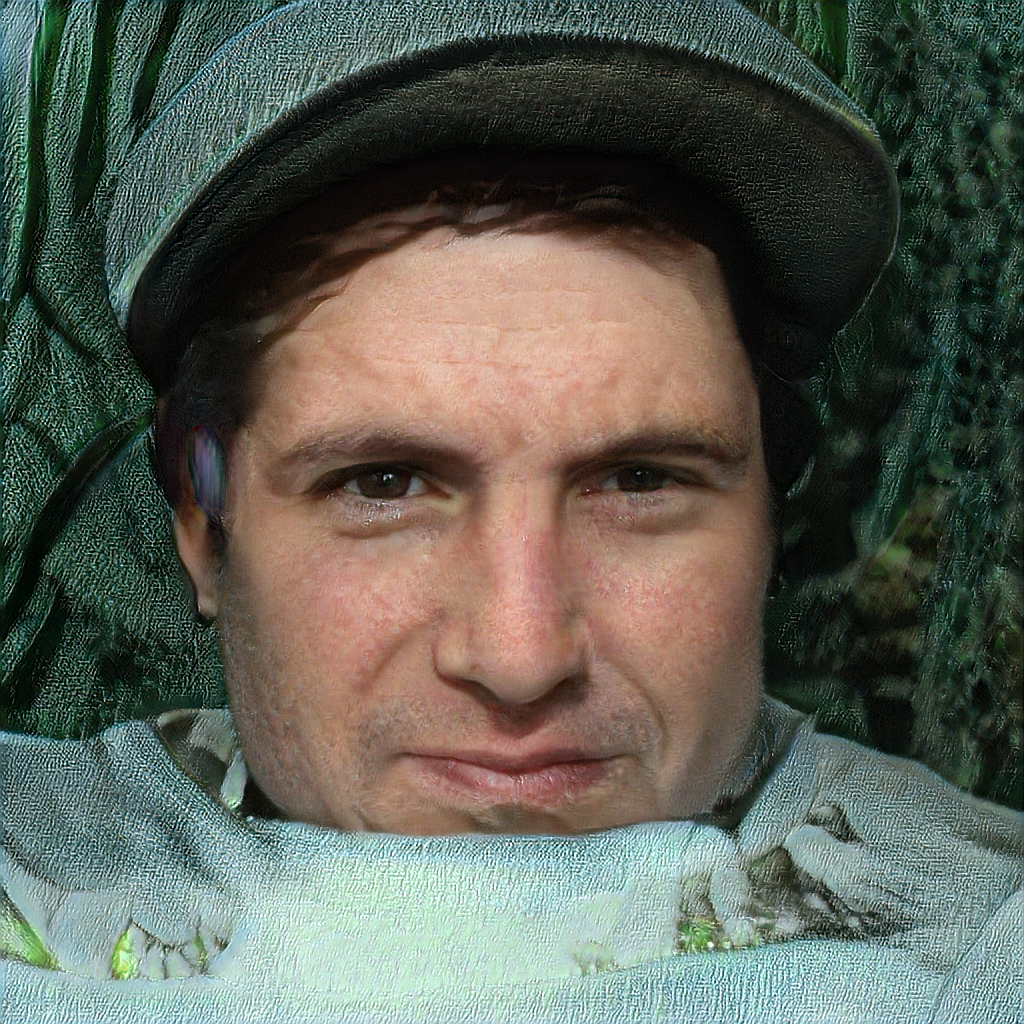

In [11]:
from IPython.display import Image as IPImage
from IPython.display import display_png

display_png(IPImage(image_filename))

生成したファイルをダウンロードします。

In [ ]:
from google.colab import files
files.download(image_filename)